In [25]:
# Import Libraries.
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
from datetime import datetime

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 8) # adjust the configuration of the plots.

# Read the data set.
df = pd.read_csv(r"/Users/user/Documents/Certificates/Git Hub/Python/Data_Set/movies.csv")


In [26]:
# Let's look at the data set.
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [27]:
# Demonstrate if there is any missing data.
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print("{} - {}%".format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [28]:
# Handling missing values.
df.dropna(axis=0, inplace=True)
df.dropna(axis=1, inplace=True)

In [29]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print("{} - {}%".format(col, pct_missing))

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [30]:
# Data types of columns.
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [31]:
# Change the data type of the columns.
df['budget'] = df['budget'].astype('int64')
df['votes'] = df['votes'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['runtime'] = df['runtime'].astype('int64')

In [32]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98


In [33]:
# Extract the year from released column and create correct year column.
df['year_corrected'] = df['released'].str.extract(r'(\d{4})')

In [34]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_corrected
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,1980


In [35]:
df = df.sort_values(by=['gross'], inplace=False, ascending=False)
df.sample(5)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_corrected
2052,The Bodyguard,R,Action,1992,"November 25, 1992 (United States)",6.3,124000,Mick Jackson,Lawrence Kasdan,Kevin Costner,United States,25000000,411006740,Kasdan Pictures,129,1992
406,Hercules,PG,Adventure,1983,"August 26, 1983 (United States)",4.0,3600,Luigi Cozzi,Luigi Cozzi,Lou Ferrigno,Italy,2500000,10676194,Cannon Films Inc.,98,1983
844,Aliens,R,Action,1986,"July 18, 1986 (United States)",8.3,668000,James Cameron,James Cameron,Sigourney Weaver,United Kingdom,18500000,131060248,Twentieth Century Fox,137,1986
1061,The Witches of Eastwick,R,Comedy,1987,"June 12, 1987 (United States)",6.6,65000,George Miller,John Updike,Jack Nicholson,United States,22000000,63766510,Warner Bros.,118,1987
4650,Sin City,R,Crime,2005,"April 1, 2005 (United States)",8.0,745000,Frank Miller,Frank Miller,Mickey Rourke,United States,40000000,158733820,Dimension Films,124,2005


In [36]:
pd.set_option("display.max_rows", None)

In [37]:
# Drop duplicates.
df.drop_duplicates().head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_corrected
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,2018


In [38]:
df.shape

(5421, 16)

In [39]:
df.describe()

,year,score,votes,budget,gross,runtime
count,5421.000000,5421.000000,5.421000e+03,5.421000e+03,5.421000e+03,5421.000000
mean,2001.661317,6.392455,1.150661e+05,3.600917e+07,1.032297e+08,108.152739
std,10.540908,0.962730,1.844073e+05,4.157337e+07,1.873027e+08,18.115698
min,1980.000000,1.900000,1.950000e+02,6.000000e+03,3.090000e+02,63.000000
25%,1993.000000,5.800000,1.900000e+04,1.000000e+07,1.073640e+07,95.000000
50%,2002.000000,6.500000,5.200000e+04,2.180000e+07,3.686941e+07,105.000000
75%,2011.000000,7.100000,1.290000e+05,4.500000e+07,1.124625e+08,118.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,271.000000


In [40]:
# Hypothesis.
# Budget has high correlation.

# Company has high correlation.

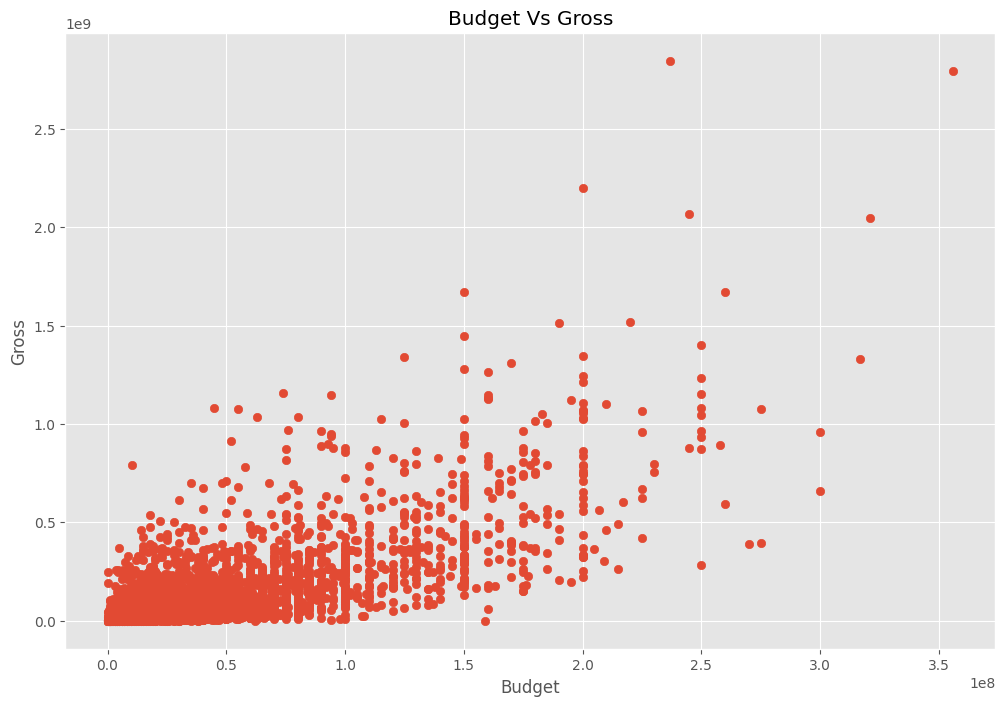

In [41]:
# Scatter plot with budget vs gross.
plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget Vs Gross')
plt.xlabel('Budget')
plt.ylabel('Gross')

plt.show()

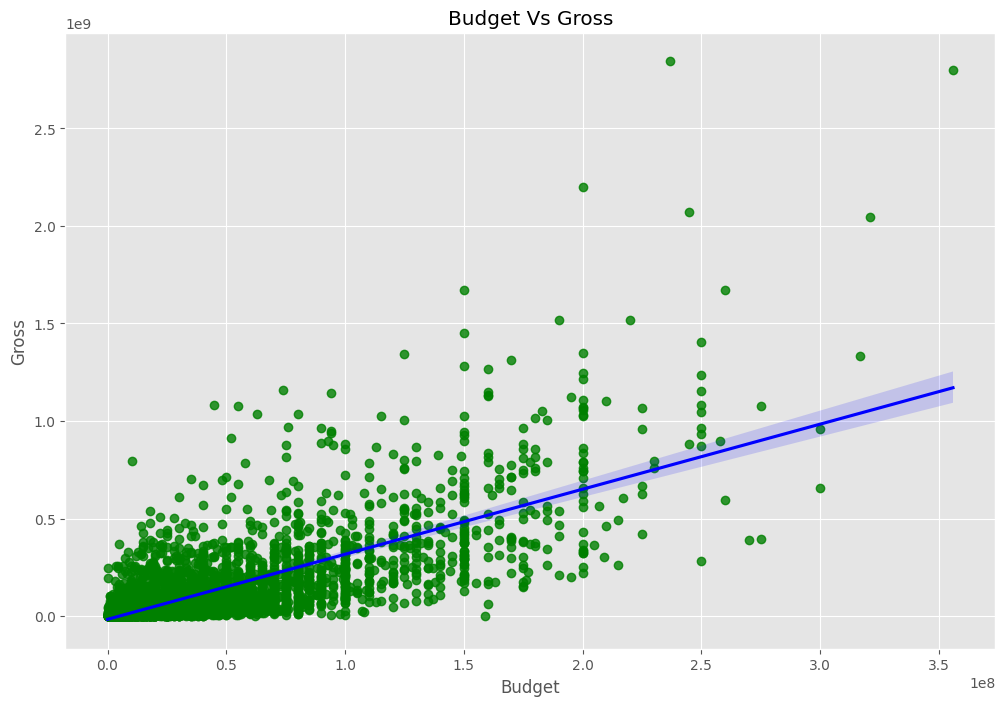

In [42]:
# Plot budget vs gross using seaborn.
sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "green"}, line_kws={"color" : "blue"})
plt.title('Budget Vs Gross')
plt.xlabel('Budget')
plt.ylabel('Gross')

plt.show()

In [50]:
# Demonstrate correlation for numeric values.
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr(method='pearson') #pearson, kendall, spearman.
correlation_matrix

,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


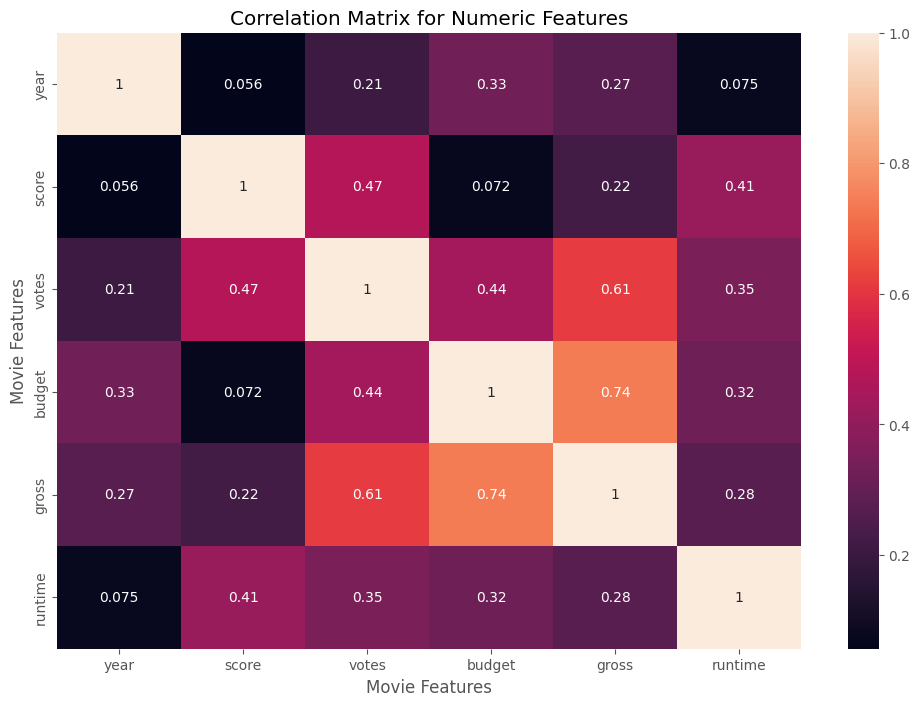

In [49]:
# High correlation between budget and gross as well as votes.
sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [52]:
# Demonstrate company.
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_corrected
5445,386,5,0,2009,527,7.8,1100000,785,1263,1534,47,237000000,2847246203,1382,162,29
7445,388,5,0,2019,137,8.4,903000,105,513,1470,47,356000000,2797501328,983,181,39
3045,4909,5,6,1997,534,7.8,1100000,785,1263,1073,47,200000000,2201647264,1382,194,17
6663,3643,5,0,2015,529,7.8,876000,768,1806,356,47,245000000,2069521700,945,138,35
7244,389,5,0,2018,145,8.4,897000,105,513,1470,47,321000000,2048359754,983,149,38


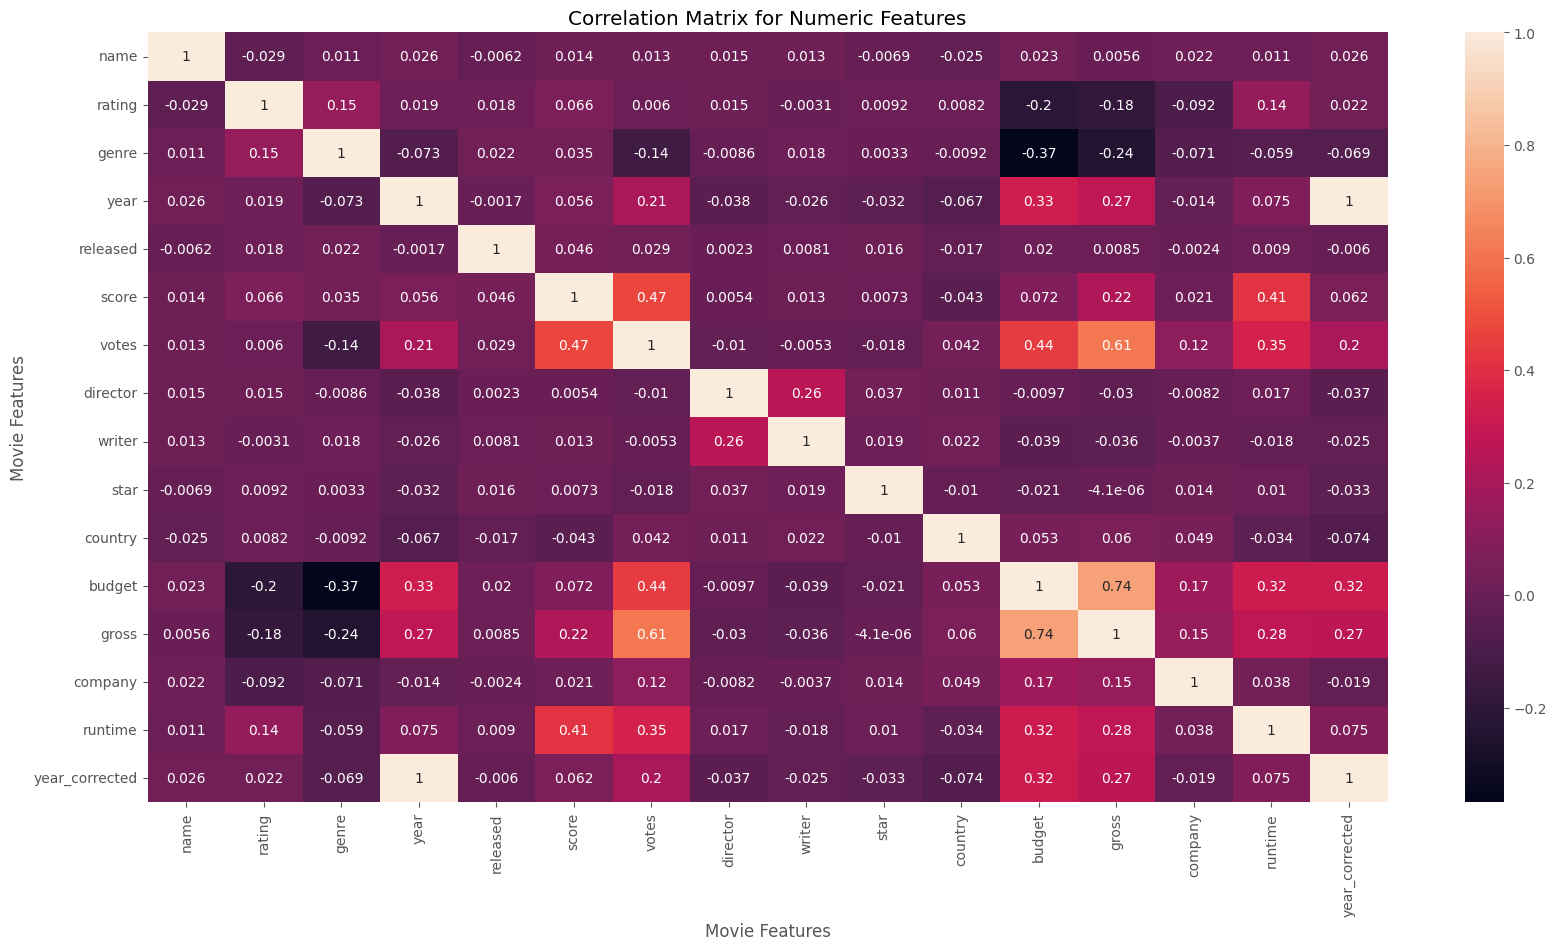

In [57]:
correlation_matrix_numerized = df_numerized.corr(method='pearson')
plt.figure(figsize=[20,10])
sns.heatmap(correlation_matrix_numerized, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [58]:
df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_corrected
name,1.000000,-0.029234,0.010996,0.025542,-0.006152,0.014450,0.012615,0.015246,0.012880,-0.006882,-0.025490,0.023392,0.005639,0.021697,0.010850,0.025542
rating,-0.029234,1.000000,0.147796,0.019499,0.018083,0.065983,0.006031,0.014656,-0.003149,0.009196,0.008230,-0.203946,-0.181906,-0.092357,0.140792,0.022021
genre,0.010996,0.147796,1.000000,-0.073167,0.022142,0.035106,-0.135990,-0.008553,0.017578,0.003341,-0.009164,-0.368523,-0.244101,-0.071334,-0.059237,-0.069147
year,0.025542,0.019499,-0.073167,1.000000,-0.001740,0.056386,0.206021,-0.038354,-0.025908,-0.032157,-0.066748,0.327722,0.274321,-0.014333,0.075077,0.998726
released,-0.006152,0.018083,0.022142,-0.001740,1.000000,0.045874,0.028833,0.002308,0.008072,0.015706,-0.017228,0.019952,0.008501,-0.002407,0.008975,-0.005989
score,0.014450,0.065983,0.035106,0.056386,0.045874,1.000000,0.474256,0.005413,0.012843,0.007296,-0.043051,0.072001,0.222556,0.020656,0.414068,0.061923
votes,0.012615,0.006031,-0.135990,0.206021,0.028833,0.474256,1.000000,-0.010376,-0.005316,-0.017638,0.041551,0.439675,0.614751,0.118470,0.352303,0.203098
director,0.015246,0.014656,-0.008553,-0.038354,0.002308,0.005413,-0.010376,1.000000,0.261735,0.036593,0.011133,-0.009662,-0.029560,-0.008223,0.017433,-0.037371
writer,0.012880,-0.003149,0.017578,-0.025908,0.008072,0.012843,-0.005316,0.261735,1.000000,0.018520,0.022488,-0.039466,-0.035885,-0.003697,-0.017561,-0.025495
star,-0.006882,0.009196,0.003341,-0.032157,0.015706,0.007296,-0.017638,0.036593,0.018520,1.000000,-0.009990,-0.021473,-0.000004,0.014082,0.010108,-0.032687


In [59]:
correlation_matr = df_numerized.corr()

corr_pairs = correlation_matr.unstack()

corr_pairs

name            name              1.000000
                rating           -0.029234
                genre             0.010996
                year              0.025542
                released         -0.006152
                score             0.014450
                votes             0.012615
                director          0.015246
                writer            0.012880
                star             -0.006882
                country          -0.025490
                budget            0.023392
                gross             0.005639
                company           0.021697
                runtime           0.010850
                year_corrected    0.025542
rating          name             -0.029234
                rating            1.000000
                genre             0.147796
                year              0.019499
                released          0.018083
                score             0.065983
                votes             0.006031
           

In [60]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

genre           budget           -0.368523
budget          genre            -0.368523
gross           genre            -0.244101
genre           gross            -0.244101
rating          budget           -0.203946
budget          rating           -0.203946
rating          gross            -0.181906
gross           rating           -0.181906
votes           genre            -0.135990
genre           votes            -0.135990
company         rating           -0.092357
rating          company          -0.092357
country         year_corrected   -0.073569
year_corrected  country          -0.073569
year            genre            -0.073167
genre           year             -0.073167
                company          -0.071334
company         genre            -0.071334
genre           year_corrected   -0.069147
year_corrected  genre            -0.069147
year            country          -0.066748
country         year             -0.066748
genre           runtime          -0.059237
runtime    

In [61]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

gross           votes             0.614751
votes           gross             0.614751
gross           budget            0.740247
budget          gross             0.740247
year            year_corrected    0.998726
year_corrected  year              0.998726
name            name              1.000000
company         company           1.000000
gross           gross             1.000000
budget          budget            1.000000
country         country           1.000000
star            star              1.000000
writer          writer            1.000000
director        director          1.000000
votes           votes             1.000000
score           score             1.000000
released        released          1.000000
year            year              1.000000
genre           genre             1.000000
rating          rating            1.000000
runtime         runtime           1.000000
year_corrected  year_corrected    1.000000
dtype: float64

In [62]:
# Company has low correlation.

# Budget and the votes have the highest correlaton to the gross.
